In [1]:
import sqlite3
import random
import pandas as pd
import numpy as np

## Creating Aggregate Store Sales

In [2]:
# Tarun Krishna Edpuganti 

# Read the CSV file into a DataFrame
train_df = pd.read_csv('train.csv')

# Convert the 'Date' column to datetime format if it's not already
train_df['Date'] = pd.to_datetime(train_df['Date'])

print(train_df.shape)
train_df.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
# Tarun Krishna Edpuganti 

# Group by 'Store' and 'Date' and aggregate 'Weekly_Sales' using sum
agg_df = train_df.groupby(['Store', 'Date']).agg({'Weekly_Sales': 'sum'}).reset_index()

print(agg_df.shape)
agg_df.head()

(6435, 3)


,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [4]:
# Tarun Krishna Edpuganti 

agg_df.to_csv('store_sales.csv', index=False)

In [5]:
# Anudeep Devulapally 

test = pd.read_csv('store_sales.csv')
print(test.shape)
test.head()

(6435, 3)


,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [6]:
# Anudeep Devulapally 

feature_df = pd.read_csv('store_conditions.csv')
feature_df['Date'] = pd.to_datetime(feature_df['Date'])
feature_df.shape

(8190, 12)

In [7]:
# Anudeep Devulapally 

# Perform inner join on 'Date' column
merged_df = pd.merge(agg_df, feature_df, on=['Store', 'Date'], how='inner')

# Print the result
print(merged_df.shape)
merged_df.head()

(6435, 13)


,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Creating Store Details Table

In [8]:
# Pavan Sai Ganesh Vemulapalli 

random.seed(16)

num_stores = 45
# Generate dummy data
store_numbers = list(range(1, num_stores + 1))
store_names = ["Walmart Store " + str(num) for num in store_numbers]


first_names = ["John", "Jane", "Robert", "Emily", "Michael"]
last_names = ["Doe", "Smith", "Johnson", "Davis", "Brown"]
managers = [f"{random.choice(first_names)} {random.choice(last_names)}" for _ in range(num_stores)]

city_names = ["New York", "Los Angeles", "Bloomington", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Francisco"]


In [9]:
# Pavan Sai Ganesh Vemulapalli 

# Create a DataFrame
data = {
    'StoreNumber': store_numbers,
    'StoreName': store_names,
    'Manager': managers,
    'Location': [random.choice(city_names) for _ in range(num_stores)],
}

store_details_df = pd.DataFrame(data)

store_details_df.to_csv('store_details.csv', index=False)
store_details_df

,StoreNumber,StoreName,Manager,Location
0,1,Walmart Store 1,Robert Davis,San Diego
1,2,Walmart Store 2,Emily Johnson,Los Angeles
2,3,Walmart Store 3,Emily Smith,Chicago
3,4,Walmart Store 4,Emily Doe,New York
4,5,Walmart Store 5,Emily Johnson,Philadelphia
5,6,Walmart Store 6,Jane Smith,San Francisco
6,7,Walmart Store 7,John Johnson,New York
7,8,Walmart Store 8,Robert Johnson,Los Angeles
8,9,Walmart Store 9,Jane Brown,San Francisco
9,10,Walmart Store 10,Robert Doe,New York


In [22]:
# Tarun Krishna Edpuganti 

#Create a database 
conn = sqlite3.connect("Final_Project_ADT_test3.db")

In [23]:
# Tarun Krishna Edpuganti 

#Create a cursor object 
cursor = conn.cursor()

In [24]:
# Tarun Krishna Edpuganti 

#Create a table - STORE DEATILS
cursor.execute('''CREATE TABLE IF NOT EXISTS store_details (
                    StoreNumber INTEGER PRIMARY KEY,
                    StoreName TEXT NOT NULL,
                    Manager TEXT NOT NULL,
                    Location TEXT NOT NULL)''')

#Now let us insert values into the table

import csv

with open('store_details.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader, None)
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO store_details (StoreNumber, StoreName, Manager, Location) 
            VALUES (?, ?, ?, ?)''', row)

In [25]:
# Tarun Krishna Edpuganti 

# Checking if the table has the all rows from the csv
cursor.execute('''SELECT * FROM store_details''')

# Fetch all rows from the last executed statement
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 'Walmart Store 1', 'Robert Davis', 'San Diego')
(2, 'Walmart Store 2', 'Emily Johnson', 'Los Angeles')
(3, 'Walmart Store 3', 'Emily Smith', 'Chicago')
(4, 'Walmart Store 4', 'Emily Doe', 'New York')
(5, 'Walmart Store 5', 'Emily Johnson', 'Philadelphia')
(6, 'Walmart Store 6', 'Jane Smith', 'San Francisco')
(7, 'Walmart Store 7', 'John Johnson', 'New York')
(8, 'Walmart Store 8', 'Robert Johnson', 'Los Angeles')
(9, 'Walmart Store 9', 'Jane Brown', 'San Francisco')
(10, 'Walmart Store 10', 'Robert Doe', 'New York')
(11, 'Walmart Store 11', 'Jane Brown', 'Philadelphia')
(12, 'Walmart Store 12', 'Robert Doe', 'Bloomington')
(13, 'Walmart Store 13', 'Jane Brown', 'San Francisco')
(14, 'Walmart Store 14', 'John Davis', 'Houston')
(15, 'Walmart Store 15', 'Emily Brown', 'Chicago')
(16, 'Walmart Store 16', 'Robert Smith', 'Bloomington')
(17, 'Walmart Store 17', 'Robert Johnson', 'Dallas')
(18, 'Walmart Store 18', 'Robert Davis', 'New York')
(19, 'Walmart Store 19', 'John Johnson', 'Chic

In [26]:
# Anudeep Devulapally 

#Create a table - STORE SALES
cursor.execute('''CREATE TABLE IF NOT EXISTS store_sales (
                    Store INTEGER,
                    Date TEXT NOT NULL,
                    Weekly_Sales REAL NOT NULL,
                    FOREIGN KEY(Store) REFERENCES store_details(StoreNumber))''')

#Now let us insert values into the table

with open('store_sales.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader, None)
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO store_sales (Store, Date, Weekly_Sales) 
            VALUES (?, ?, ?)''', row)

In [30]:
# Anudeep Devulapally 

# Checking if the table has the all rows from the csv
cursor.execute('''SELECT * FROM store_sales''')

# Fetch all rows from the last executed statement
rows = cursor.fetchall()


# Print the rows
# for row in rows:
#     print(row)

In [31]:
# Pavan Sai Ganesh Vemulapalli 

#Create a table - STORE CONDITIONS
cursor.execute('''CREATE TABLE IF NOT EXISTS store_conditions (
                    Store INTEGER,
                    Date TEXT NOT NULL,
                    Temperature REAL NOT NULL,
                    Fuel_Price REAL NOT NULL,
                    MarkDown1 REAL NULL,
                    MarkDown2 REAL NULL,
                    MarkDown3 REAL NULL,
                    MarkDown4 REAL NULL,
                    MarkDown5 REAL NULL,
                    CPI REAL NOT NULL,
                    Unemployment REAL NOT NULL,
                    IsHoliday TEXT NOT NULL,
                    FOREIGN KEY(Store) REFERENCES store_details(StoreNumber))''')

#Now let us insert values into the table

with open('store_conditions.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader, None)
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO store_conditions (Store, Date, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, IsHoliday) 
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''', row)

In [32]:
# Pavan Sai Ganesh Vemulapalli 

# Checking if the table has the all rows from the csv
cursor.execute('''SELECT * FROM store_conditions''')

# Fetch all rows from the last executed statement
rows = cursor.fetchall()

# Print the rows
# for row in rows:
#     print(row)

In [33]:
# Pavan Sai Ganesh Vemulapalli 

# Retrieving the schema of all tables
cursor.execute("SELECT name, sql FROM sqlite_master WHERE type='table';")

tables = cursor.fetchall()

# Print the name and schema of each table
for table in tables:
    name, schema = table
    print(f"Table Name: {name}\nSchema:\n{schema}\n")

Table Name: store_details
Schema:
CREATE TABLE store_details (
                    StoreNumber INTEGER PRIMARY KEY,
                    StoreName TEXT NOT NULL,
                    Manager TEXT NOT NULL,
                    Location TEXT NOT NULL)

Table Name: store_sales
Schema:
CREATE TABLE store_sales (
                    Store INTEGER,
                    Date TEXT NOT NULL,
                    Weekly_Sales REAL NOT NULL,
                    FOREIGN KEY(Store) REFERENCES store_details(StoreNumber))

Table Name: store_conditions
Schema:
CREATE TABLE store_conditions (
                    Store INTEGER,
                    Date TEXT NOT NULL,
                    Temperature REAL NOT NULL,
                    Fuel_Price REAL NOT NULL,
                    MarkDown1 REAL NULL,
                    MarkDown2 REAL NULL,
                    MarkDown3 REAL NULL,
                    MarkDown4 REAL NULL,
                    MarkDown5 REAL NULL,
                    CPI REAL NOT NULL,
         

In [11]:
# Tarun Krishna Edpuganti 

# Create a ER diagrm
import networkx as nx
import matplotlib.pyplot as plt

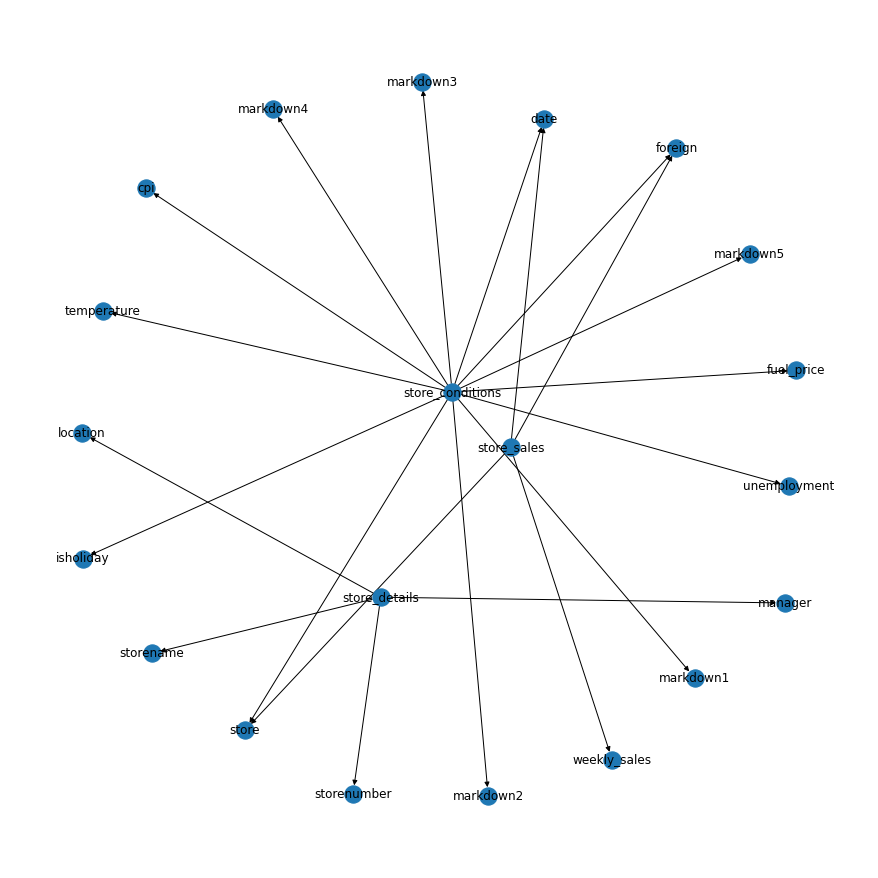

In [12]:
# Tarun Krishna Edpuganti 

# Initialize a directed graph
G = nx.DiGraph()

# Process each table
for table in tables:
    table_name = table[0]
    schema = table[1].split('\n')
    G.add_node(table_name)  # Add a node for each table

    # Add columns as nodes and create edges from table to columns
    for line in schema:
        line = line.strip().lower()
        if line.startswith('create table') or line == '(' or line == ');':
            continue
        column_name = line.split(' ')[0].strip('"')
        G.add_node(column_name)
        G.add_edge(table_name, column_name)

# Draw the graph
plt.figure(figsize=(12, 12)) 
nx.draw(G, with_labels=True)
plt.show()

In [13]:
conn.commit()

# Connect to the Database

In [2]:
# Pavan Sai Ganesh Vemulapalli 

# Connect to the database 
conn = sqlite3.connect("Final_Project_ADT.db")

#Create a cursor object 
cursor = conn.cursor()

# CREATE Queries

In [20]:
# Pavan Sai Ganesh Vemulapalli 

store_details_data = (46, 'Walmart 1', 'John Doe', 'Blommington')
store_sales_data = (46, '2023-01-01', 50000.00)
store_conditions_data = (46, '2023-01-01', 25.5, 2.75, 100.00, 50.00, 75.00, 30.00, 20.00, 150.5, 8.5, 'No')


In [26]:
# Pavan Sai Ganesh Vemulapalli 

# Insert data into store_details
cursor.execute("INSERT INTO store_details (StoreNumber, StoreName, Manager, Location) VALUES (?, ?, ?, ?)", store_details_data)
conn.commit()


In [21]:
# Pavan Sai Ganesh Vemulapalli 

# Insert data into store_sales
cursor.execute("INSERT INTO store_sales (Store, Date, Weekly_Sales) VALUES (?, ?, ?)", store_sales_data)
conn.commit()

In [ ]:
# Pavan Sai Ganesh Vemulapalli 

# Insert data into store_conditions
cursor.execute("INSERT INTO store_conditions (Store, Date, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, IsHoliday) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", store_conditions_data)
conn.commit()


# READ Queries

In [5]:
# Anudeep Devulapally 

store_number = 1
limit = 10
date = '2010-07-30'

In [29]:
# Anudeep Devulapally 

# Get all Store Details
cursor.execute("SELECT * FROM store_details")
result = cursor.fetchall()
print(result)

[(1, 'Walmart Store 1', 'Robert Davis', 'San Diego'), (2, 'Walmart Store 2', 'Emily Johnson', 'Los Angeles'), (3, 'Walmart Store 3', 'Emily Smith', 'Chicago'), (4, 'Walmart Store 4', 'Emily Doe', 'New York'), (5, 'Walmart Store 5', 'Emily Johnson', 'Philadelphia'), (6, 'Walmart Store 6', 'Jane Smith', 'San Francisco'), (7, 'Walmart Store 7', 'John Johnson', 'New York'), (8, 'Walmart Store 8', 'Robert Johnson', 'Los Angeles'), (9, 'Walmart Store 9', 'Jane Brown', 'San Francisco'), (10, 'Walmart Store 10', 'Robert Doe', 'New York'), (11, 'Walmart Store 11', 'Jane Brown', 'Philadelphia'), (12, 'Walmart Store 12', 'Robert Doe', 'Bloomington'), (13, 'Walmart Store 13', 'Jane Brown', 'San Francisco'), (14, 'Walmart Store 14', 'John Davis', 'Houston'), (15, 'Walmart Store 15', 'Emily Brown', 'Chicago'), (16, 'Walmart Store 16', 'Robert Smith', 'Bloomington'), (17, 'Walmart Store 17', 'Robert Johnson', 'Dallas'), (18, 'Walmart Store 18', 'Robert Davis', 'New York'), (19, 'Walmart Store 19', 'J

In [31]:
# Anudeep Devulapally 

# Get Store Details of a specific store
cursor.execute("SELECT * FROM store_details WHERE StoreNumber = ?", (store_number,))
result = cursor.fetchall()
print(result)

[(1, 'Walmart Store 1', 'Robert Davis', 'San Diego')]


In [16]:
# Anudeep Devulapally 

# Get all sales for a specific store
cursor.execute("SELECT * FROM store_sales WHERE Store = ? LIMIT ?", (store_number,limit))
result = cursor.fetchall()
print(result)

[(1, '2010-02-05', 1643690.9), (1, '2010-02-12', 1641957.44), (1, '2010-02-19', 1611968.17), (1, '2010-02-26', 1409727.59), (1, '2010-03-05', 1554806.68), (1, '2010-03-12', 1439541.59), (1, '2010-03-19', 1472515.79), (1, '2010-03-26', 1404429.92), (1, '2010-04-02', 1594968.28), (1, '2010-04-09', 1545418.53)]


In [14]:
# Anudeep Devulapally 

# Get sales for a specific store on a specific date
cursor.execute("SELECT * FROM store_sales WHERE Store = ? AND Date = ?", (store_number, date))
result = cursor.fetchall()
print(result)


[(1, '2010-07-30', 1371986.6)]


In [15]:
# Anudeep Devulapally 

# Get store conditions for a specific store on a specific date
cursor.execute("SELECT * FROM store_conditions WHERE Store = ? AND Date = ?", (store_number, date))
result = cursor.fetchall()
print(result)

[(1, '2010-07-30', 81.84, 2.64, 'NA', 'NA', 'NA', 'NA', 'NA', 211.3699032, 7.787, 'FALSE')]


# Update Queries

In [ ]:
# Pavan Sai Ganesh Vemulapalli 

# Update store details
new_manager = 'Jane Smith'
cursor.execute("UPDATE store_details SET Manager = ? WHERE StoreNumber = ?", (new_manager, store_number))
conn.commit()


In [ ]:
# Pavan Sai Ganesh Vemulapalli 

# Update weekly sales for a specific date and store
new_weekly_sales = 55000.00
cursor.execute("UPDATE store_sales SET Weekly_Sales = ? WHERE Store = ? AND Date = ?", (new_weekly_sales, store_number, date))
conn.commit()


# Delete Queries

In [ ]:
# Tarun Krishna Edpuganti 

# Delete a specific store's details
cursor.execute("DELETE FROM store_details WHERE StoreNumber = ?", (store_number,))
conn.commit()

In [ ]:
# Tarun Krishna Edpuganti 

# Delete sales records for a specific date and store
cursor.execute("DELETE FROM store_sales WHERE Store = ? AND Date = ?", (store_number, date))
conn.commit()

# Retrieve Total Sales for Each Store

In [32]:
# Tarun Krishna Edpuganti 

cursor.execute("""
    SELECT d.StoreNumber, d.StoreName, d.Manager, d.Location, SUM(s.Weekly_Sales) AS TotalSales
    FROM store_details d
    JOIN store_sales s ON d.StoreNumber = s.Store
    GROUP BY d.StoreNumber, d.StoreName, d.Manager, d.Location
""")
result = cursor.fetchall()
for row in result:
    print(row)

(1, 'Walmart Store 1', 'Robert Davis', 'San Diego', 222402808.85000005)
(2, 'Walmart Store 2', 'Emily Johnson', 'Los Angeles', 275382440.9800001)
(3, 'Walmart Store 3', 'Emily Smith', 'Chicago', 57586735.07)
(4, 'Walmart Store 4', 'Emily Doe', 'New York', 299543953.38)
(5, 'Walmart Store 5', 'Emily Johnson', 'Philadelphia', 45475688.9)
(6, 'Walmart Store 6', 'Jane Smith', 'San Francisco', 223756130.64000002)
(7, 'Walmart Store 7', 'John Johnson', 'New York', 81598275.14000002)
(8, 'Walmart Store 8', 'Robert Johnson', 'Los Angeles', 129951181.13)
(9, 'Walmart Store 9', 'Jane Brown', 'San Francisco', 77789218.99)
(10, 'Walmart Store 10', 'Robert Doe', 'New York', 271617713.8899999)
(11, 'Walmart Store 11', 'Jane Brown', 'Philadelphia', 193962786.79999992)
(12, 'Walmart Store 12', 'Robert Doe', 'Bloomington', 144287230.14999998)
(13, 'Walmart Store 13', 'Jane Brown', 'San Francisco', 286517703.80000013)
(14, 'Walmart Store 14', 'John Davis', 'Houston', 288999911.34000003)
(15, 'Walmart St

# Retrieve Average Sales and Conditions for Each Store

In [33]:
# Anudeep Devulapally 

# Join store_sales, store_details, and store_conditions to get average sales and conditions for each store
cursor.execute("""
    SELECT d.StoreNumber, d.StoreName, d.Manager, d.Location, AVG(s.Weekly_Sales) AS AvgWeeklySales,
           AVG(c.Temperature) AS AvgTemperature, AVG(c.Fuel_Price) AS AvgFuelPrice
    FROM store_details d
    JOIN store_sales s ON d.StoreNumber = s.Store
    JOIN store_conditions c ON d.StoreNumber = c.Store AND s.Date = c.Date
    GROUP BY d.StoreNumber, d.StoreName, d.Manager, d.Location
""")
result = cursor.fetchall()
for row in result:
    print(row)

(1, 'Walmart Store 1', 'Robert Davis', 'San Diego', 1555264.3975524479, 68.30678321678319, 3.2196993006993)
(2, 'Walmart Store 2', 'Emily Johnson', 'Los Angeles', 1925751.3355244761, 68.21636363636361, 3.2196993006993)
(3, 'Walmart Store 3', 'Emily Smith', 'Chicago', 402704.44104895106, 71.43419580419578, 3.2196993006993)
(4, 'Walmart Store 4', 'Emily Doe', 'New York', 2094712.9606993007, 62.25335664335665, 3.216972027972028)
(5, 'Walmart Store 5', 'Emily Johnson', 'Philadelphia', 318011.8104895105, 69.41013986013986, 3.2196993006993)
(6, 'Walmart Store 6', 'Jane Smith', 'San Francisco', 1564728.1862937063, 69.70000000000003, 3.2196993006993)
(7, 'Walmart Store 7', 'John Johnson', 'New York', 570617.3086713288, 39.72027972027973, 3.2415594405594406)
(8, 'Walmart Store 8', 'Robert Johnson', 'Los Angeles', 908749.5183916084, 62.51398601398601, 3.2196993006993)
(9, 'Walmart Store 9', 'Jane Brown', 'San Francisco', 543980.5523776223, 67.77517482517479, 3.2196993006993)
(10, 'Walmart Store 

# Retrieve Stores with High Sales During Holidays

In [41]:
# Pavan Sai Ganesh Vemulapalli 

cursor.execute("""
    SELECT DISTINCT d.StoreNumber, d.StoreName, d.Manager, d.Location
    FROM store_sales s
    JOIN store_conditions c ON s.Store = c.Store AND s.Date = c.Date
    JOIN store_details d ON s.Store = d.StoreNumber
    WHERE c.IsHoliday = 'TRUE' AND s.Weekly_Sales > (SELECT AVG(Weekly_Sales) FROM store_sales)
""")
result = cursor.fetchall()
for row in result:
    print(row)

(1, 'Walmart Store 1', 'Robert Davis', 'San Diego')
(2, 'Walmart Store 2', 'Emily Johnson', 'Los Angeles')
(4, 'Walmart Store 4', 'Emily Doe', 'New York')
(6, 'Walmart Store 6', 'Jane Smith', 'San Francisco')
(8, 'Walmart Store 8', 'Robert Johnson', 'Los Angeles')
(10, 'Walmart Store 10', 'Robert Doe', 'New York')
(11, 'Walmart Store 11', 'Jane Brown', 'Philadelphia')
(12, 'Walmart Store 12', 'Robert Doe', 'Bloomington')
(13, 'Walmart Store 13', 'Jane Brown', 'San Francisco')
(14, 'Walmart Store 14', 'John Davis', 'Houston')
(15, 'Walmart Store 15', 'Emily Brown', 'Chicago')
(17, 'Walmart Store 17', 'Robert Johnson', 'Dallas')
(18, 'Walmart Store 18', 'Robert Davis', 'New York')
(19, 'Walmart Store 19', 'John Johnson', 'Chicago')
(20, 'Walmart Store 20', 'Emily Davis', 'San Diego')
(21, 'Walmart Store 21', 'Michael Smith', 'Chicago')
(22, 'Walmart Store 22', 'Michael Johnson', 'Los Angeles')
(23, 'Walmart Store 23', 'Michael Doe', 'Los Angeles')
(24, 'Walmart Store 24', 'Robert Doe', '